In [152]:
import os
import psycopg2
import pandas as pd
import matplotlib.pyplot as plt
from dotenv import load_dotenv
from datetime import datetime, timedelta



load_dotenv()

conn = psycopg2.connect(os.getenv('DATABASE_URL'))

# Open a cursor to perform database operations
cur = conn.cursor()

# Execute a query
cur.execute("""
SELECT *, date_trunc('hour', timestamp) as hour FROM trades
order by timestamp desc
limit 20000
""")

# Retrieve query results
records = cur.fetchall()

# Convert to pandas DataFrame
df = pd.DataFrame(records, columns=[desc[0] for desc in cur.description])

# Close communication with the database
cur.close()
conn.close()

df

,signature,mint,timestamp,trades,token_volume,usd_volume,sol_volume,sells,token_spent,usd_got,sol_got,purchases,token_got,usd_spent,sol_spent,hour
0,4vL6xqA6D4BAtkxMpGV6knXTrSSQMFwj6kAX7c5tjwcvG1...,EATGZHJViJsk7nEKkrdJicwNbfpkJfAtmrEmrjXR8NBj,2024-01-02 16:57:11,1,1.100196e+06,336.504193,0.000000,1,1.100196e+06,336.504193,0.000000,0,0.000000e+00,0.000000,0.000000,2024-01-02 16:00:00
1,2iwKQXpFSimn5oxJLtvPn6M2ehC6GQ7GcWe2Y35yAgH1Tb...,CYmmZen6WU4YjiRNYDn9suk2zubrhTcVEb7GAiPSDNYe,2024-01-02 16:56:04,1,2.948137e+04,0.000000,0.000000,1,2.948137e+04,0.000000,0.000000,0,0.000000e+00,0.000000,0.000000,2024-01-02 16:00:00
2,5bFkHLLPhKSA1HUSn84sydKBikWzNFjrdTQJNBmpXWtW2V...,42t1c91HuHZT3rCqQ5EoRqqwEUL1R9Bgtx6QjbAEKyqE,2024-01-02 16:56:02,1,1.392370e+03,0.000000,0.002146,1,1.392370e+03,0.000000,0.002146,0,0.000000e+00,0.000000,0.000000,2024-01-02 16:00:00
3,5gSw6grhbRqYbGy4PukgyMwC6p6WWLu2MFK6csDTNnXqcQ...,7xKXtg2CW87d97TXJSDpbD5jBkheTqA83TZRuJosgAsU,2024-01-02 16:55:13,1,1.127129e+04,152.727209,0.000000,0,0.000000e+00,0.000000,0.000000,1,1.127129e+04,152.727209,0.000000,2024-01-02 16:00:00
4,MsEH6crYrLqhXKYjvADkq8QL3xByrCbry4ka279GPF6o3U...,7xKXtg2CW87d97TXJSDpbD5jBkheTqA83TZRuJosgAsU,2024-01-02 16:55:03,1,2.396412e+03,32.433526,0.000000,0,0.000000e+00,0.000000,0.000000,1,2.396412e+03,32.433526,0.000000,2024-01-02 16:00:00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19995,5X1RAwd3zoQsnfrYhFHXJh8r7SAAMpPhtZ27xUtCi9uMaz...,9gwTegFJJErDpWJKjPfLr2g2zrE3nL1v5zpwbtsk3c6P,2023-12-30 10:43:53,1,3.942357e+02,0.000000,0.220007,0,0.000000e+00,0.000000,0.000000,1,3.942357e+02,0.000000,0.220007,2023-12-30 10:00:00
19996,5AHq2tc6tEhH534Z9maFF8zxccfn1hyw3B9Vb3wzxjPosJ...,74DSHnK1qqr4z1pXjLjPAVi8XFngZ635jEVpdkJtnizQ,2023-12-30 10:43:30,1,8.632936e+05,0.000000,2.010888,0,0.000000e+00,0.000000,0.000000,1,8.632936e+05,0.000000,2.010888,2023-12-30 10:00:00
19997,3VvjFzCCMvx4ryN7Bv7hKoNLYP1VuzAKu7jw6PN31KiTqd...,7jjZxSrCEDVoFGsLYoSkPX334hgR5fcz4SHRcPZ8iuXR,2023-12-30 10:43:24,1,6.000000e+05,20.016895,0.000000,1,6.000000e+05,20.016895,0.000000,0,0.000000e+00,0.000000,0.000000,2023-12-30 10:00:00
19998,2QEDsLzEVbWbHEGgKUzem41KgJEDdAGYcjHWFgQD8zJnfY...,4qmnSzq5Xn5Wf1aC52Z5cGj7MJj9jvZsFgLcHG6NdHoq,2023-12-30 10:43:23,1,1.210797e+06,0.000000,0.820005,0,0.000000e+00,0.000000,0.000000,1,1.210797e+06,0.000000,0.820005,2023-12-30 10:00:00


In [153]:
# all uniq pairs of mint and hour
df['mint_hour'] = df['mint'] + df['hour'].astype(str)
df['mint_hour'].unique()

array(['EATGZHJViJsk7nEKkrdJicwNbfpkJfAtmrEmrjXR8NBj2024-01-02 16:00:00',
       'CYmmZen6WU4YjiRNYDn9suk2zubrhTcVEb7GAiPSDNYe2024-01-02 16:00:00',
       '42t1c91HuHZT3rCqQ5EoRqqwEUL1R9Bgtx6QjbAEKyqE2024-01-02 16:00:00',
       ...,
       '6sWet5H2qNpXnV5CwxSmRThx4z3uVtdjHqRB4VyMkJ8Z2023-12-30 10:00:00',
       'AD27ov5fVU2XzwsbvnFvb1JpCBaCB5dRXrczV9CqSVGb2023-12-30 10:00:00',
       '7jjZxSrCEDVoFGsLYoSkPX334hgR5fcz4SHRcPZ8iuXR2023-12-30 10:00:00'],
      dtype=object)

In [161]:
# Removing rows where both usd_volume and sol_volume are 0
df = df[~((df['usd_volume'] == 0) & (df['sol_volume'] == 0))]
threashold_sol = 0.01
df_sol = df[(df['sol_volume'] > threashold_sol)]
df_sol['price_sol'] = df_sol['sol_volume'] / df_sol['token_volume']
df_sol = df_sol.drop(['signature','mint_hour','usd_volume','usd_spent','usd_got'],axis=1)
df_sol

/var/folders/f0/pkklpwzn60qgw7s040tqnts80000gn/T/ipykernel_11374/2784576633.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_sol['price_sol'] = df_sol['sol_volume'] / df_sol['token_volume']


,mint,timestamp,trades,token_volume,sol_volume,sells,token_spent,sol_got,purchases,token_got,sol_spent,hour,price_sol
8,AUYZoApYuvZeVmDcfC6LK6Rz1zShWYju5ZG7eCTjQbre,2024-01-02 16:54:28,1,1.235523e+03,0.040145,0,0.000000e+00,0.000000,1,1.235523e+03,0.040145,2024-01-02 16:00:00,3.249232e-05
9,5TiWmMBHUt4s8WZqFtL6TYeGqSn1a5LXTguHavPQp6B6,2024-01-02 16:53:50,1,2.871202e+05,0.668210,0,0.000000e+00,0.000000,1,2.871202e+05,0.668210,2024-01-02 16:00:00,2.327284e-06
10,DezXAZ8z7PnrnRJjz3wXBoRgixCa6xjnB7YaB1pPB263,2024-01-02 16:53:30,1,1.468993e+06,0.186516,0,0.000000e+00,0.000000,1,1.468993e+06,0.186516,2024-01-02 16:00:00,1.269683e-07
11,EKpQGSJtjMFqKZ9KQanSqYXRcF8fBopzLHYxdM65zcjm,2024-01-02 16:53:20,1,7.484010e+02,1.000082,0,0.000000e+00,0.000000,1,7.484010e+02,1.000082,2024-01-02 16:00:00,1.336292e-03
12,iotEVVZLEywoTn1QdwNPddxPWszn3zFhEot3MfL9fns,2024-01-02 16:53:18,1,2.263075e+04,0.380949,1,2.263075e+04,0.380949,0,0.000000e+00,0.000000,2024-01-02 16:00:00,1.683325e-05
...,...,...,...,...,...,...,...,...,...,...,...,...,...
19993,6sWet5H2qNpXnV5CwxSmRThx4z3uVtdjHqRB4VyMkJ8Z,2023-12-30 10:44:11,1,1.344364e+06,2.032741,1,1.344364e+06,2.032741,0,0.000000e+00,0.000000,2023-12-30 10:00:00,1.512046e-06
19995,9gwTegFJJErDpWJKjPfLr2g2zrE3nL1v5zpwbtsk3c6P,2023-12-30 10:43:53,1,3.942357e+02,0.220007,0,0.000000e+00,0.000000,1,3.942357e+02,0.220007,2023-12-30 10:00:00,5.580589e-04
19996,74DSHnK1qqr4z1pXjLjPAVi8XFngZ635jEVpdkJtnizQ,2023-12-30 10:43:30,1,8.632936e+05,2.010888,0,0.000000e+00,0.000000,1,8.632936e+05,2.010888,2023-12-30 10:00:00,2.329321e-06
19998,4qmnSzq5Xn5Wf1aC52Z5cGj7MJj9jvZsFgLcHG6NdHoq,2023-12-30 10:43:23,1,1.210797e+06,0.820005,0,0.000000e+00,0.000000,1,1.210797e+06,0.820005,2023-12-30 10:00:00,6.772441e-07


In [162]:
# for each unique pair of mint and hour calculate average token_volume
df_grouped = df_sol.groupby(['mint','hour']).mean()
df_grouped

timestamp  \
mint                                         hour                                          
12AjTG16m3oWzjVy2kP2C1bUEzZv8PayQDM9csRR1obM 2023-12-30 12:00:00 2023-12-30 12:11:54.000   
                                             2024-01-01 04:00:00 2024-01-01 04:41:57.000   
                                             2024-01-01 05:00:00 2024-01-01 05:35:53.000   
12FvihLoAzTtaA98YVuErGftCXtoc83t3YFk4WdKK79T 2023-12-30 12:00:00 2023-12-30 12:36:50.000   
                                             2023-12-30 13:00:00 2023-12-30 13:38:39.000   
...                                                                                  ...   
xABfKiG2KCHi6keTeLycW1iK7B52wJmchSWXu3YrsDp  2024-01-02 08:00:00 2024-01-02 08:17:56.000   
xobu3kyPNtHx7Mtu93FNMTTGWovA53ueombxqen9xnG  2023-12-31 01:00:00 2023-12-31 01:31:29.000   
                                             2023-12-31 02:00:00 2023-12-31 02:26:25.500   
                                             2023-12-31 22:00:00 2023-12-31 22:01:56.000   
zebeczgi5fSEtbpfQKVZKCJ3WgYXxjkMUkNNx7fLKAF  2024-01-02 11:00:00 2024-01-02 11:33:48.000   

                                                                  trades  \
mint                                         hour                          
12AjTG16m3oWzjVy2kP2C1bUEzZv8PayQDM9csRR1obM 2023-12-30 12:00:00     1.0   
                                             2024-01-01 04:00:00     1.0   
                                             2024-01-01 05:00:00     1.0   
12FvihLoAzTtaA98YVuErGftCXtoc83t3YFk4WdKK79T 2023-12-30 12:00:00     1.0   
                                             2023-12-30 13:00:00     1.0   
...                                                                  ...   
xABfKiG2KCHi6keTeLycW1iK7B52wJmchSWXu3YrsDp  2024-01-02 08:00:00     1.0   
xobu3kyPNtHx7Mtu93FNMTTGWovA53ueombxqen9xnG  2023-12-31 01:00:00     1.0   
                                             2023-12-31 02:00:00     1.0   
                                             2023-12-31 22:00:00     1.0   
zebeczgi5fSEtbpfQKVZKCJ3WgYXxjkMUkNNx7fLKAF  2024-01-02 11:00:00     1.0   

                                                                  token_volume  \
mint                                         hour                                
12AjTG16m3oWzjVy2kP2C1bUEzZv8PayQDM9csRR1obM 2023-12-30 12:00:00  4.478932e+11   
                                             2024-01-01 04:00:00  1.285154e+10   
                                             2024-01-01 05:00:00  2.474049e+09   
12FvihLoAzTtaA98YVuErGftCXtoc83t3YFk4WdKK79T 2023-12-30 12:00:00  1.211956e+04   
                                             2023-12-30 13:00:00  1.068327e+05   
...                                                                        ...   
xABfKiG2KCHi6keTeLycW1iK7B52wJmchSWXu3YrsDp  2024-01-02 08:00:00  2.099644e+09   
xobu3kyPNtHx7Mtu93FNMTTGWovA53ueombxqen9xnG  2023-12-31 01:00:00  3.020178e+05   
                                             2023-12-31 02:00:00  2.577627e+05   
                                             2023-12-31 22:00:00  9.672171e+06   
zebeczgi5fSEtbpfQKVZKCJ3WgYXxjkMUkNNx7fLKAF  2024-01-02 11:00:00  6.510839e+03   

                                                                  sol_volume  \
mint                                         hour                              
12AjTG16m3oWzjVy2kP2C1bUEzZv8PayQDM9csRR1obM 2023-12-30 12:00:00    3.271344   
                                             2024-01-01 04:00:00    0.112361   
                                             2024-01-01 05:00:00    0.015326   
12FvihLoAzTtaA98YVuErGftCXtoc83t3YFk4WdKK79T 2023-12-30 12:00:00    0.013164   
                                             2023-12-30 13:00:00    0.099417   
...                                                                      ...   
xABfKiG2KCHi6keTeLycW1iK7B52wJmchSWXu3YrsDp  2024-01-02 08:00:00    0.130005   
xobu3kyPNtHx7Mtu93FNMTTGWovA53ueombxqen9xnG  2023-12-31 01:00:00    0.207116   
                          

Timestamp('2023-12-30 10:00:00')

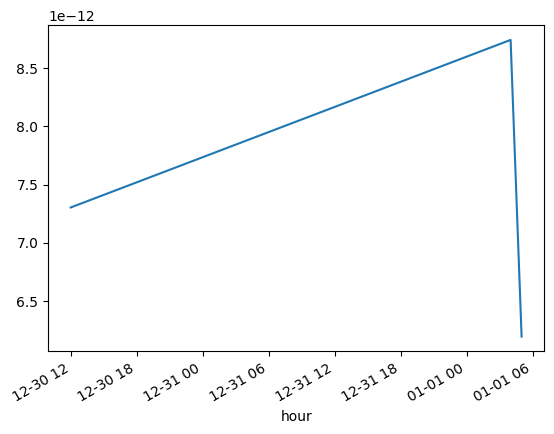

In [174]:
# time gap between trades in hours
token_avg_price_sol = df_grouped['price_sol']
token_avg_price_sol['12AjTG16m3oWzjVy2kP2C1bUEzZv8PayQDM9csRR1obM',:].index.to_series().diff().dt.total_seconds() / 3600
df_token1 = token_avg_price_sol['12AjTG16m3oWzjVy2kP2C1bUEzZv8PayQDM9csRR1obM',:]
df_token1.plot()

In [332]:
df_token = token_avg_price_sol.loc['12AjTG16m3oWzjVy2kP2C1bUEzZv8PayQDM9csRR1obM',:'2024-01-01 10:00:00']

,mint,price_sol
hour,,
2023-12-30 12:00:00,12AjTG16m3oWzjVy2kP2C1bUEzZv8PayQDM9csRR1obM,7.303848e-12
2024-01-01 04:00:00,12AjTG16m3oWzjVy2kP2C1bUEzZv8PayQDM9csRR1obM,8.742986e-12
2024-01-01 05:00:00,12AjTG16m3oWzjVy2kP2C1bUEzZv8PayQDM9csRR1obM,6.194660e-12


In [337]:
period_length = 14 # in hours

prices_dict = {}
features_dict = {}
# And mint_names are the unique mint values
mint_names = token_avg_price_sol.index.get_level_values('mint').unique()

date_end = token_avg_price_sol.index.get_level_values('hour').max()
date_start = token_avg_price_sol.index.get_level_values('hour').min()
#Create a DateTime range, hourly
date_range = pd.date_range(start=date_start, end=date_end, freq='H')


for mint_name in mint_names:
    for hour in date_range:
        df_token = token_avg_price_sol.loc[mint_name, pd.Timestamp(date_start) : pd.Timestamp(hour)]
        df_token = pd.DataFrame(df_token).reset_index().set_index('hour').drop('mint',axis=1)
        if df_token.shape[0] > 0:
            current_price = df_token.iloc[-1]
        else: current_price = 0

        #Create a DateTime index from n hours ago to hour, hourly
        f_range = pd.date_range(start=hour-timedelta(hours=period_length), end=hour, freq='H')
        # Create the empty DataFrame with this DateTime index
        df_features = pd.DataFrame(index=f_range)

        # Merging the data from df_token into df_features
        # Using an outer join to keep all timestamps and fill missing values with NaN
        # Then forward fill NaNs and replace remaining NaNs with 0
        df_features = df_features.join([df_token], how ='left').ffill().fillna(0)

        # Define the range for your index
        n = df_features.shape[0]

        # Create index labels from 'p0' to 'pn'
        index_labels = [f'p{i}' for i in range(n)]
        # Create a categorical index
        categorical_index = pd.CategoricalIndex(index_labels, ordered=True)

        df_features.index = categorical_index

        prices_dict[(mint_name, pd.Timestamp(hour))] = current_price
        features_dict[(mint_name, pd.Timestamp(hour))] = df_features


In [364]:
token_avg_price_sol.reset_index()

,mint,hour,price_sol
0,12AjTG16m3oWzjVy2kP2C1bUEzZv8PayQDM9csRR1obM,2023-12-30 12:00:00,7.303848e-12
1,12AjTG16m3oWzjVy2kP2C1bUEzZv8PayQDM9csRR1obM,2024-01-01 04:00:00,8.742986e-12
2,12AjTG16m3oWzjVy2kP2C1bUEzZv8PayQDM9csRR1obM,2024-01-01 05:00:00,6.194660e-12
3,12FvihLoAzTtaA98YVuErGftCXtoc83t3YFk4WdKK79T,2023-12-30 12:00:00,1.091987e-06
4,12FvihLoAzTtaA98YVuErGftCXtoc83t3YFk4WdKK79T,2023-12-30 13:00:00,9.305847e-07
...,...,...,...
5895,xABfKiG2KCHi6keTeLycW1iK7B52wJmchSWXu3YrsDp,2024-01-02 08:00:00,6.191778e-11
5896,xobu3kyPNtHx7Mtu93FNMTTGWovA53ueombxqen9xnG,2023-12-31 01:00:00,7.796699e-07
5897,xobu3kyPNtHx7Mtu93FNMTTGWovA53ueombxqen9xnG,2023-12-31 02:00:00,1.131996e-07
5898,xobu3kyPNtHx7Mtu93FNMTTGWovA53ueombxqen9xnG,2023-12-31 22:00:00,3.165042e-08


In [437]:
# And mint_names are the unique mint values from df
mint_names = token_avg_price_sol.index.get_level_values('mint').unique()

date_end = token_avg_price_sol.index.get_level_values('hour').max()
date_start = token_avg_price_sol.index.get_level_values('hour').min()
#Create a DateTime range, hourly
date_range = pd.date_range(start=date_start, end=date_end, freq='H')

n = 15 # hours
# Create index labels from 'p0' to 'pn'
index_labels = [f'p{i}' for i in range(df_features.shape[0])]

# Create a MultiIndex from all combinations of mint_names and date_range
multi_index = pd.MultiIndex.from_product([mint_names, date_range])

# Initialize df_results with this MultiIndex
df_results = pd.DataFrame(index=multi_index)
df_results.reset_index(inplace=True)
df_results.rename(columns={'level_0':'mint', 'level_1':'hour'}, inplace=True)

df_results['current_price'] = np.nan
#Add each label from index_labels as an empty column
for label in index_labels:
    df_results[label] = np.nan

# Assign values from df_token DataFrames to the new columns in df_result
for index, row in df_results.iterrows():
    mint_name = row['mint']
    hour = row['hour']

    # Retrieve the corresponding series from dict_features
    if (mint_name, pd.Timestamp(hour)) in features_dict:
        token_series = features_dict[(mint_name, hour)].to_numpy()

        # Assign the values to the row in df
        for col, value in zip(index_labels, token_series):
            df_results.at[index, col] = value
        #df_results.at[index, 'mint'] = mint_name
        #df_results.at[index, 'hour'] = hour
    else:
        print(f'No features found for {mint_name} at {hour}')
df_results['current_price'] = df_results[index_labels[-1]]
df_results

,mint,hour,current_price,p0,p1,p2,p3,p4,p5,p6,p7,p8,p9,p10,p11,p12,p13,p14
0,12AjTG16m3oWzjVy2kP2C1bUEzZv8PayQDM9csRR1obM,2023-12-30 10:00:00,0.000000e+00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.000000e+00,0.000000e+00,0.000000e+00
1,12AjTG16m3oWzjVy2kP2C1bUEzZv8PayQDM9csRR1obM,2023-12-30 11:00:00,0.000000e+00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.000000e+00,0.000000e+00,0.000000e+00
2,12AjTG16m3oWzjVy2kP2C1bUEzZv8PayQDM9csRR1obM,2023-12-30 12:00:00,7.303848e-12,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.000000e+00,0.000000e+00,7.303848e-12
3,12AjTG16m3oWzjVy2kP2C1bUEzZv8PayQDM9csRR1obM,2023-12-30 13:00:00,7.303848e-12,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.000000e+00,7.303848e-12,7.303848e-12
4,12AjTG16m3oWzjVy2kP2C1bUEzZv8PayQDM9csRR1obM,2023-12-30 14:00:00,7.303848e-12,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.000000,7.303848e-12,7.303848e-12,7.303848e-12
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
81207,zebeczgi5fSEtbpfQKVZKCJ3WgYXxjkMUkNNx7fLKAF,2024-01-02 12:00:00,7.679629e-05,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.000000e+00,7.679629e-05,7.679629e-05
81208,zebeczgi5fSEtbpfQKVZKCJ3WgYXxjkMUkNNx7fLKAF,2024-01-02 13:00:00,7.679629e-05,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.000000,7.679629e-05,7.679629e-05,7.679629e-05
81209,zebeczgi5fSEtbpfQKVZKCJ3WgYXxjkMUkNNx7fLKAF,2024-01-02 14:00:00,7.679629e-05,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.000077,7.679629e-05,7.679629e-05,7.679629e-05
81210,zebeczgi5fSEtbpfQKVZKCJ3WgYXxjkMUkNNx7fLKAF,2024-01-02 15:00:00,7.679629e-05,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.000077,0.000077,7.679629e-05,7.679629e-05,7.679629e-05
